In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("/content/drive/MyDrive/municipality_counsil_salary.pkl","rb") as f:
  mun = pickle.load(f)

In [3]:
mun

<xarray.Dataset>
Dimensions:       (municipality: 1741, variables: 7)
Coordinates:
  * municipality  (municipality) int64 0 1 2 3 4 5 ... 1736 1737 1738 1739 1740
  * variables     (variables) <U18 'prefecture' 'city' ... 'city_dummy'
Data variables:
    2014          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0
    2015          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0
    2016          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0
    2017          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0
    2018          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0
    2019          (municipality, variables) object '北海道' '札幌市' ... 1.98e+05 0

In [8]:
ed = mun.to_array().stack(z=("municipality","variable"))

In [30]:
ed = ed.to_pandas().T.reset_index()

In [35]:
ed = ed.rename(columns={"variable":"year"})

In [36]:
ed

variables,municipality,year,prefecture,city,population,salary_chairperson,salary_vicec,salary_council,city_dummy
0,0,2014,北海道,札幌市,1.92629e+06,1.04e+06,950000,860000,1
1,0,2015,北海道,札幌市,1.94183e+06,1.04e+06,950000,860000,1
2,0,2016,北海道,札幌市,1.94749e+06,1.04e+06,950000,860000,1
3,0,2017,北海道,札幌市,1.95235e+06,1.04e+06,950000,860000,1
4,0,2018,北海道,札幌市,1.95546e+06,1.04e+06,950000,860000,1
...,...,...,...,...,...,...,...,...,...
10441,1740,2015,沖縄県,与那国町,NaN,257000,213000,198000,0
10442,1740,2016,沖縄県,与那国町,1696,257000,213000,198000,0
10443,1740,2017,沖縄県,与那国町,1723,257000,213000,198000,0
10444,1740,2018,沖縄県,与那国町,1710,257000,213000,198000,0


In [37]:
%load_ext rpy2.ipython
!apt-get -qq install r-cran-data.table

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Selecting previously unselected package r-cran-data.table.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../r-cran-data.table_1.13.6-1cran1.1804.0_amd64.deb ...
Unpacking r-cran-data.table (1.13.6-1cran1.1804.0) ...
Setting up r-cran-data.table (1.13.6-1cran1.1804.0) ...


In [38]:
%%R
library(data.table)
setDTthreads(2) # 2コアでdata.tableを使う
library(ggplot2)

In [45]:
ed1 = ed.loc[:,["municipality","year","salary_council","city_dummy"]]
ed1 = np.array(ed1)

In [46]:
ed1

array([[0, 2014, 860000.0, 1],
       [0, 2015, 860000.0, 1],
       [0, 2016, 860000.0, 1],
       ...,
       [1740, 2017, 198000.0, 0],
       [1740, 2018, 198000.0, 0],
       [1740, 2019, 198000.0, 0]], dtype=object)

In [48]:
%%R -i ed1
ncol(ed1)
 :

RParsingError: ignored

In [49]:
ed.to_csv("/content/drive/MyDrive/mun_0207.csv")

In [50]:
ed.to_csv("munforr.csv")

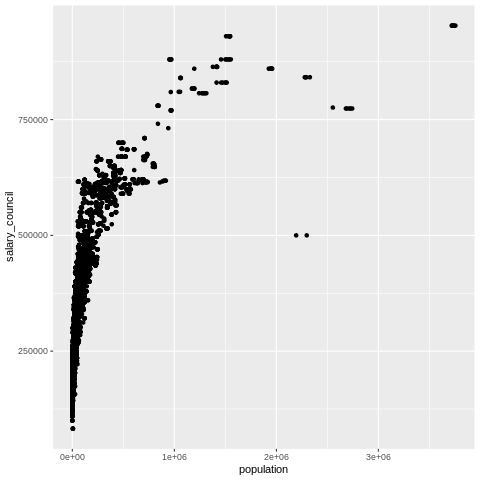

In [58]:
%%R
library(data.table)
setDTthreads(2) # 2コアでdata.tableを使う
dt <- fread('munforr.csv')
library(ggplot2)
g <- ggplot(dt, aes(x = population, y = salary_council))
g <- g + geom_point()
plot(g)

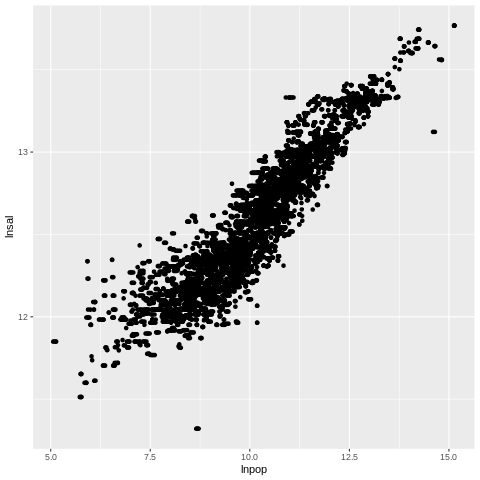

In [65]:
%%R
dt$lnsal = log(dt$salary_council)
dt$lnpop = log(dt$population)
g <- ggplot(dt, aes(x = lnpop, y = lnsal))
g <- g + geom_point()
plot(g)

In [66]:
#対数人口と対数報酬の単回帰
%%R
res = lm(lnsal~lnpop,data=dt)
summary(res)


Call:
lm(formula = lnsal ~ lnpop, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91631 -0.09703  0.00293  0.08948  0.79095 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.081571   0.011520   875.1   <2e-16 ***
lnpop        0.247330   0.001106   223.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.153 on 8588 degrees of freedom
  (1856 observations deleted due to missingness)
Multiple R-squared:  0.8535,	Adjusted R-squared:  0.8534 
F-statistic: 5.002e+04 on 1 and 8588 DF,  p-value: < 2.2e-16



In [75]:
!apt-get -qq install r-cran-plm

Selecting previously unselected package r-cran-bdsmatrix.
(Reading database ... 146591 files and directories currently installed.)
Preparing to unpack .../00-r-cran-bdsmatrix_1.3-4-1cran1.1804.0_amd64.deb ...
Unpacking r-cran-bdsmatrix (1.3-4-1cran1.1804.0) ...
Selecting previously unselected package r-cran-formula.
Preparing to unpack .../01-r-cran-formula_1.2-4-1cran1.1804.0_all.deb ...
Unpacking r-cran-formula (1.2-4-1cran1.1804.0) ...
Selecting previously unselected package r-cran-gbrd.
Preparing to unpack .../02-r-cran-gbrd_0.4-11-1cran1.1804.0_all.deb ...
Unpacking r-cran-gbrd (0.4-11-1cran1.1804.0) ...
Selecting previously unselected package r-cran-zoo.
Preparing to unpack .../03-r-cran-zoo_1.8-8-1cran1.1804.0_amd64.deb ...
Unpacking r-cran-zoo (1.8-8-1cran1.1804.0) ...
Selecting previously unselected package r-cran-lmtest.
Preparing to unpack .../04-r-cran-lmtest_0.9.37-2.1804.0_amd64.deb ...
Unpacking r-cran-lmtest (0.9.37-2.1804.0) ...
Selecting previously unselected package 

In [76]:
#対数人口と対数報酬の単回帰, year and municilaplity fixed effect
%%R
library(plm)
res = plm(lnsal~lnpop,index = c("municipality", "year"),model = "within",data=dt)
summary(res)

R[write to console]: 
Attaching package: ‘plm’


R[write to console]: The following object is masked from ‘package:data.table’:

    between




Oneway (individual) effect Within Model

Call:
plm(formula = lnsal ~ lnpop, data = dt, model = "within", index = c("municipality", 
    "year"))

Unbalanced Panel: n = 1741, T = 4-6, N = 8590

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-3.4964e-01 -1.0023e-03  8.0114e-05  1.1101e-03  2.2368e-01 

Coefficients:
       Estimate Std. Error t-value  Pr(>|t|)    
lnpop -0.067949   0.010465 -6.4928 9.016e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    3.2887
Residual Sum of Squares: 3.2686
R-Squared:      0.0061184
Adj. R-Squared: -0.24656
F-statistic: 42.1564 on 1 and 6848 DF, p-value: 9.0156e-11
